Problem statement: 
- To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r'C:\Users\KSUKA\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r'C:\Users\KSUKA\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

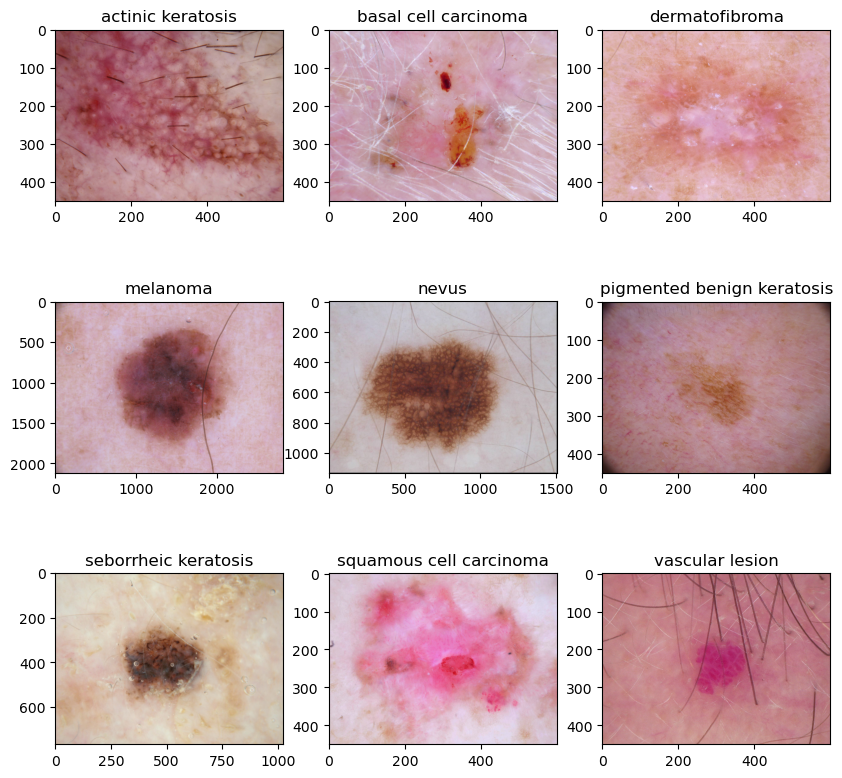

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):  # Iterate through the actual number of classes
    image_paths = list(data_dir_train.glob(class_names[i] + '/*.jpg'))
    if len(image_paths) > 0:  # Check if there are any images for this class
        image = plt.imread(str(image_paths[0]))  # Read the first image if available
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[i])
        plt.imshow(image)
    else:
        print(f"No images found for class: {class_names[i]}")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
##### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential

num_classes = 9
img_height, img_width = 180, 180

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Rescaling(1./255)
])

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


### Compile the model


In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,497 (982.41 KB)

 Trainable params: 251,497 (982.41 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 60s 324ms/step - accuracy: 0.1386 - loss: 2.1911 - val_accuracy: 0.2220 - val_loss: 2.1657
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 289ms/step - accuracy: 0.1911 - loss: 2.1051 - val_accuracy: 0.1336 - val_loss: 2.1712
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 292ms/step - accuracy: 0.2229 - loss: 2.0248 - val_accuracy: 0.3615 - val_loss: 1.6560
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 294ms/step - accuracy: 0.3736 - loss: 1.6431 - val_accuracy: 0.4157 - val_loss: 1.4943
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 294ms/step - accuracy: 0.4262 - loss: 1.5050 - val_accuracy: 0.4157 - val_loss: 1.5084
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 290ms/step - accuracy: 0.4565 - loss: 1.4202 - val_accuracy: 0.4759 - val_loss: 1.3772
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 288ms/step - accuracy: 0.4980 - loss: 1.3212 - val_accuracy: 0.5160 - val_loss: 1.3225
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.5445 - loss: 1

### Visualizing training results

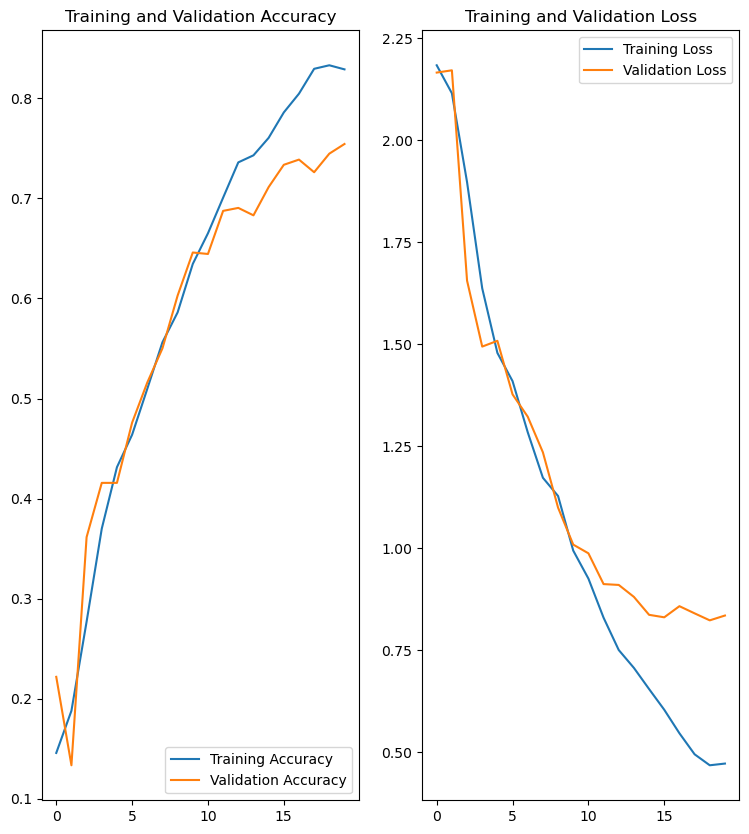

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**
- Training Loss: Decreases consistently over epochs, showing the model is learning the training data well.

- Validation Loss: After initially decreasing, it remains relatively stable with slight fluctuations.

- Training Accuracy: Increases steadily, indicating that the model is getting better at predicting on the training data.

- Validation Accuracy: Also increases but with smaller gains, suggesting the model is generalizing reasonably well.


In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

img_height, img_width = 180, 180

# Create the data augmentation strategy
data_augmentation = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define input shape here
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

# Print summary of the data augmentation layers
data_augmentation.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 180, 180, 3)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

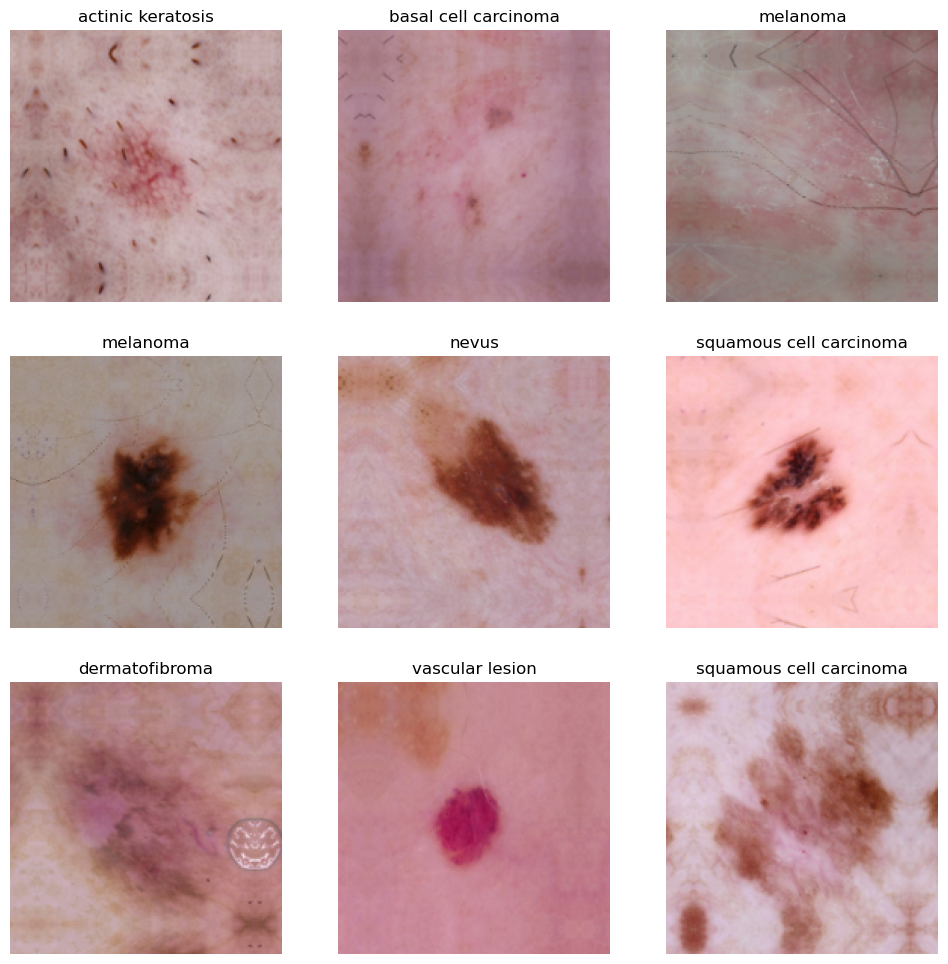

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential

num_classes = 9
img_height, img_width = 180, 180

# Data Augmentation strategy
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2, fill_mode='reflect'),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    Rescaling(1./255)
])
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout Layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_classes, activation="softmax"))


### Compiling the model

In [20]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 60s 333ms/step - accuracy: 0.1401 - loss: 2.1885 - val_accuracy: 0.1403 - val_loss: 2.1850
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.1371 - loss: 2.1791 - val_accuracy: 0.1359 - val_loss: 2.1909
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.1486 - loss: 2.1727 - val_accuracy: 0.1403 - val_loss: 2.1896
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 314ms/step - accuracy: 0.1378 - loss: 2.1909 - val_accuracy: 0.1433 - val_loss: 2.1882
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 55s 326ms/step - accuracy: 0.1343 - loss: 2.1793 - val_accuracy: 0.1425 - val_loss: 2.1867
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 333ms/step - accuracy: 0.1402 - loss: 2.1802 - val_accuracy: 0.1344 - val_loss: 2.1828
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 55s 327ms/step - accuracy: 0.1408 - loss: 2.1747 - val_accuracy: 0.1403 - val_loss: 2.1895
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 331ms/step - accuracy: 0.1399 - loss: 2

### Visualizing the results

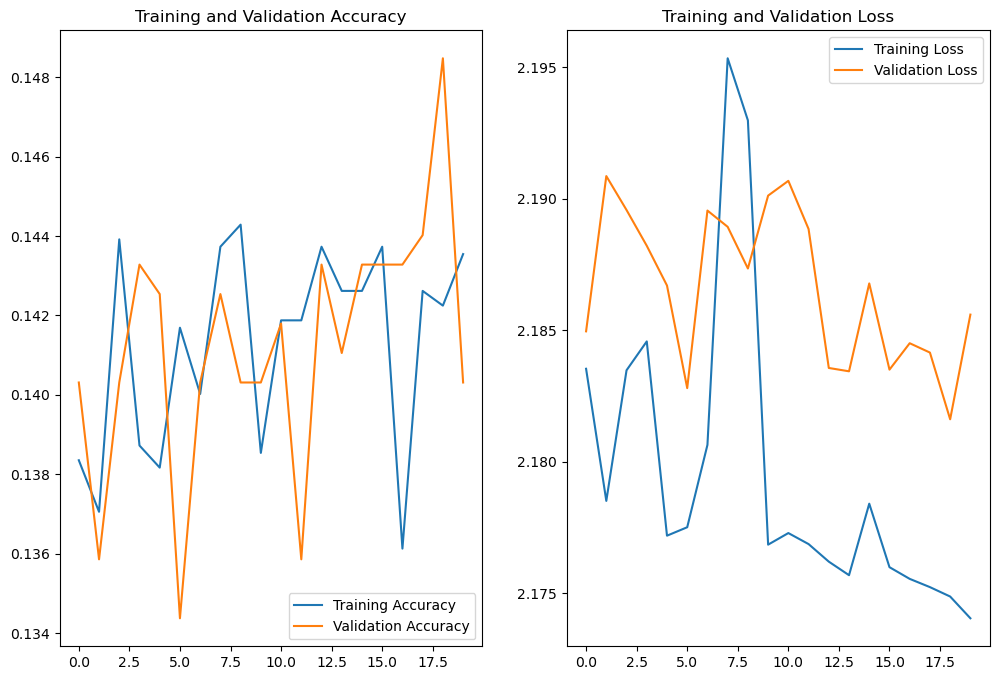

In [22]:
import matplotlib.pyplot as plt

# Extract values from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

# Set up the figure size and layout
plt.figure(figsize=(12, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**
- Analysis of Latest Model Performance:
-  ***Accuracy***:
- Training Accuracy: Starts around 0.14 and barely improves, ending at 0.14.
- Validation Accuracy: Stays around 0.14 without significant improvement.
- ***Loss***:
- Training Loss: Remains relatively high, hovering around 2.17 to 2.20.
- Validation Loss: Also remains high, close to the training loss values.

- Observation:
- ***Stagnant Training and Validation Metrics***: 
- Both accuracy and loss do not show significant improvement over epochs. This suggests that the model is not learning effectively.

***No Signs of Overfitting but slightly underfitting***: 
- Since both training and validation loss are high and close to each other, overfitting is not the issue here. Instead, it looks like the model is struggling to learn and might be underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
##### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
##
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
1,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
2,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
3,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
4,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
...,...,...
2234,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2235,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2236,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2237,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
1,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
2,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
3,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
4,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
...,...,...
2234,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2235,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2236,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2237,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion


<BarContainer object of 9 artists>

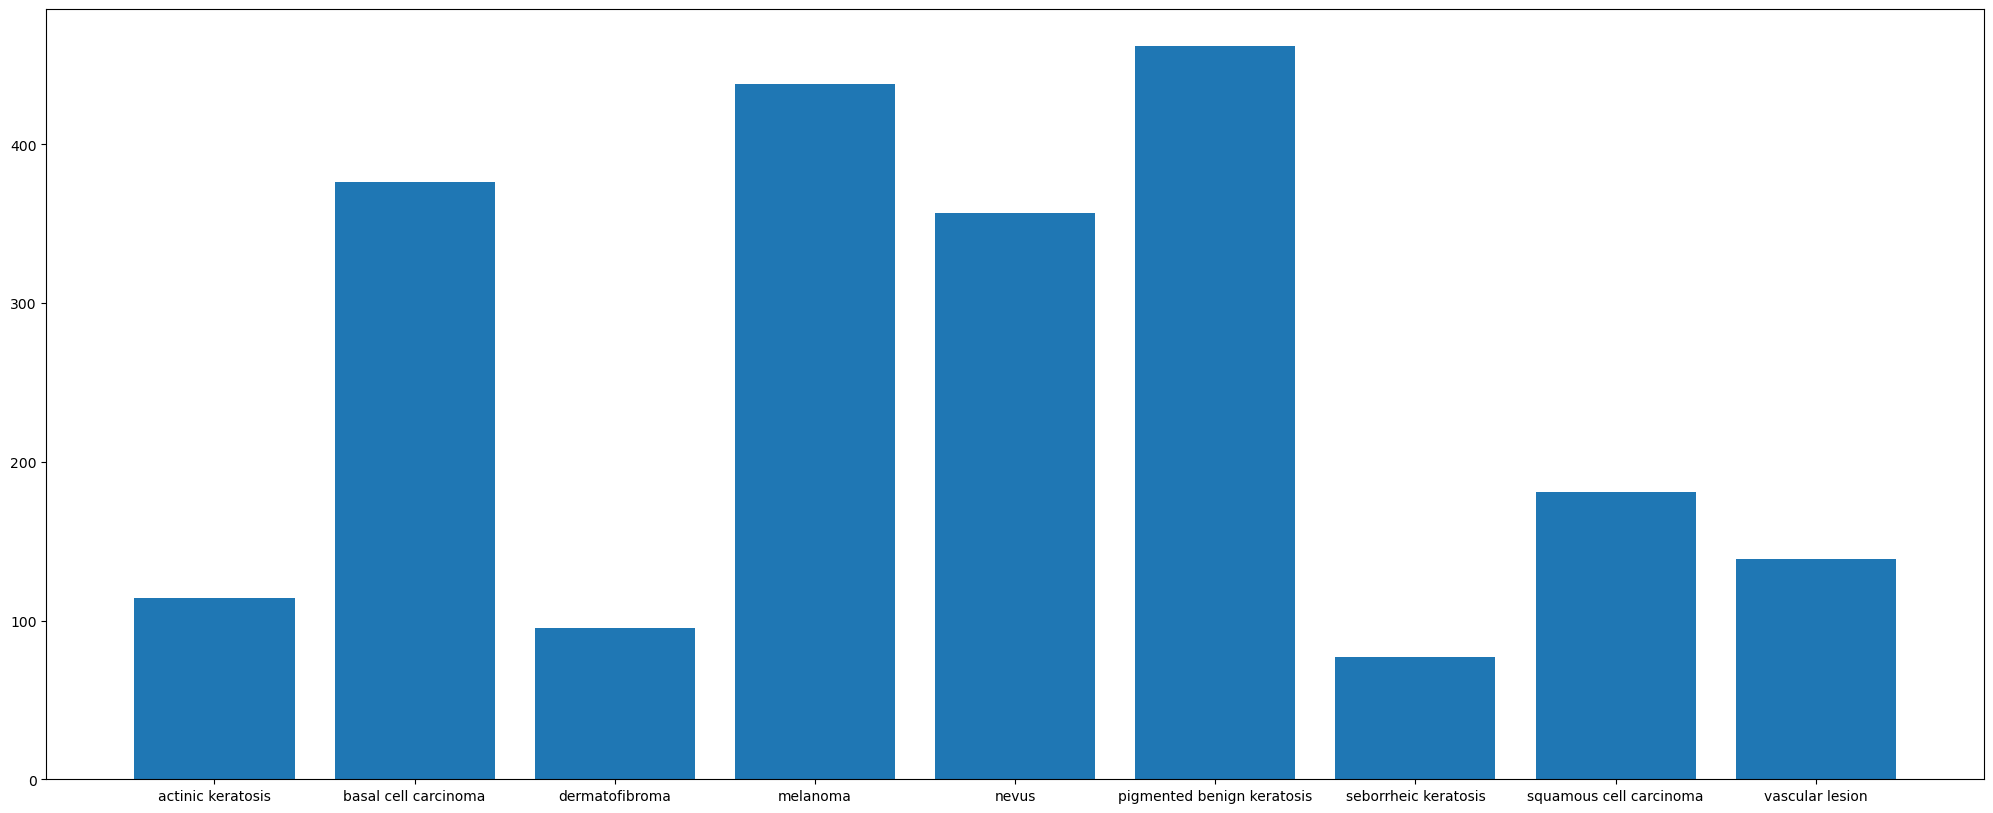

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


__Class with the Least Number of Samples:

- Actinic keratosis and dermatofibroma have the least number of samples.

__Dominant Classes:

__The classes with the highest proportionate number of samples are:

- Vascular lesion

- Squamous cell carcinoma

- Pigmented benign keratosis

In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
#path_to_training_dataset="/content/drive/MyDrive/J/Melonama Assignment/Melonama Files/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(f"C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{i}", save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)


Initialised with 114 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2221C6EC250>: 100%|█| 500/500 [00:01<00:00, 262.30 Samples


Initialised with 376 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2221CB71D50>: 100%|█| 500/500 [00:01<00:00, 259.82 Samples


Initialised with 95 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22249ADDE90>: 100%|█| 500/500 [00:01<00:00, 257.67 Samples


Initialised with 438 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x2221C629DD0>: 100%|█| 500/500 [00:11<00:


Initialised with 357 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x2224E716C10>: 100%|█| 500/500 [00:10<00:00, 46.19 Samples


Initialised with 462 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22219B2C790>: 100%|█| 500/500 [00:02<00:


Initialised with 77 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x2221A1BE790>: 100%|█| 500/500 [00:04<00


Initialised with 181 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2221A137DD0>: 100%|█| 500/500 [00:01<00:00, 255.56 Samples


Initialised with 139 image(s) found.
Output directory set to C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x22249893910>: 100%|█| 500/500 [00:02<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [42]:
import pathlib
# Go through each class-specific output directory and count images
augmented_image_count = 0
for class_name in class_names:
    data_dir_augmented = pathlib.Path(f"C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{class_name}/output")
    augmented_image_count += len(list(data_dir_augmented.glob('*.jpg')))

print(augmented_image_count)

9000


In [43]:
##
for i in class_names:

    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
1,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
2,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
3,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
4,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,actinic keratosis
...,...,...
2234,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2235,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2236,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion
2237,C:\Users\KSUKA\Downloads\CNN_assignment\Skin c...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/J/Melonama Assignment/Melonama Files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path(r"C:\Users\KSUKA\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

In [47]:
data_dir_train1

WindowsPath('C:/Users/KSUKA/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [49]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [50]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input

data_dir_train1 = pathlib.Path(r"C:\Users\KSUKA\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [52]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, Input
from tensorflow.keras.models import Sequential
import pathlib

num_classes = 9
img_height, img_width = 180, 180
batch_size = 32  # Ensure batch size is set

# Create the CNN model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define input shape here
    Rescaling(1./255)  # Rescaling layer to normalize pixel values
])

# Adding the convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Adding dropout and flatten layers
model.add(Dropout(0.25))
model.add(Flatten())

# Adding the final dense layer
model.add(Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [54]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
for images, labels in train_ds.take(1):
    print(labels)

#### **Todo:**  Train your model

In [55]:
epochs =30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 92s 312ms/step - accuracy: 0.2116 - loss: 2.0008 - val_accuracy: 0.3810 - val_loss: 1.6440
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 85s 300ms/step - accuracy: 0.3823 - loss: 1.6073 - val_accuracy: 0.4063 - val_loss: 1.6089
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 85s 301ms/step - accuracy: 0.4401 - loss: 1.4486 - val_accuracy: 0.4989 - val_loss: 1.3076
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 85s 304ms/step - accuracy: 0.4962 - loss: 1.3254 - val_accuracy: 0.4691 - val_loss: 1.4133
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 84s 300ms/step - accuracy: 0.5236 - loss: 1.2573 - val_accuracy: 0.5639 - val_loss: 1.2049
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 93s 330ms/step - accuracy: 0.5916 - loss: 1.1086 - val_accuracy: 0.6302 - val_loss: 1.0258
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 127s 451ms/step - accuracy: 0.6346 - loss: 0.9923 - val_accuracy: 0.6453 - val_loss: 0.9747
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 125s 444ms/step - accuracy: 0.6778 - loss:

#### **Todo:**  Visualize the model results

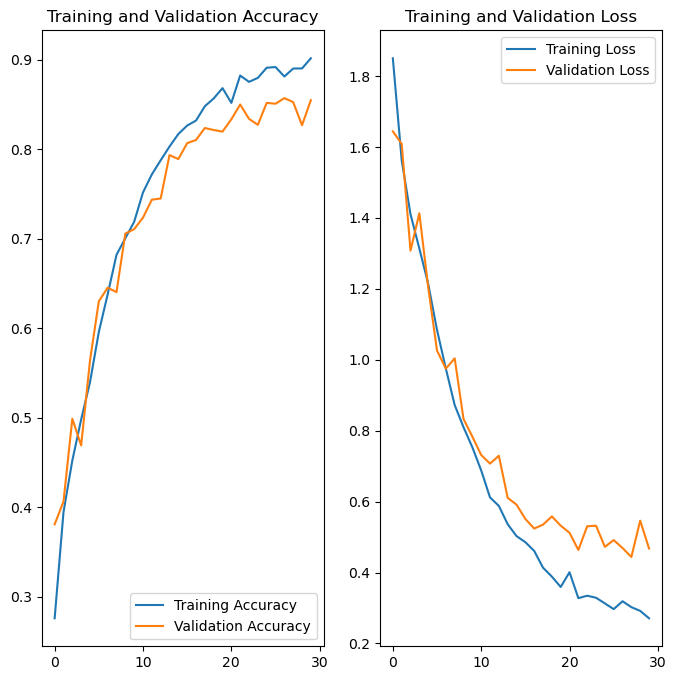

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Detailed Analysis**:
__**Accuracy**:

- Training Accuracy: Starts at 21% and improves to 89.61% by epoch 30.

  Validation Accuracy: Begins at 38.10% and improves to 85.49%.

__Loss:

- Training Loss: Decreases consistently from 2.00 to 0.2791.

- Validation Loss: Decreases from 1.64 to 0.4677.

__***Evaluation**:
- **Improvements**: Both training and validation accuracies have improved significantly from previous attempts. The training loss and validation loss are also decreasing consistently, indicating the model is learning well.

- Underfitting: No signs of underfitting here, as both accuracies are improving steadily.

- Overfitting: Minimal signs of overfitting. Training and validation metrics are close to each other, which is good.

__ **Class Rebalancing** and data augmentation appear to have had a substantial positive impact